In [1]:
from pathlib import Path
import pandas as pd
from pybedtools import BedTool
import matplotlib.pyplot as plt
import seaborn as sns

circ_level_edits = []
indir = Path('/home/hsher/scratch/circ_nextera_iter2/output/edits/')
circ_level_edits += list(indir.glob('HEK_rar11*.circ_level.tsv'))

indir = Path('/home/hsher/scratch/circ_nextera_iter/output/edits/')
circ_level_edits += list(indir.glob('circseq-bm-rar11*.circ_level.tsv'))

indir = Path('/home/hsher/scratch/circ_nextera_iter5/output/edits/')
circ_level_edits += list(indir.glob('*.circ_level.tsv'))

indir = Path('/home/hsher/scratch/circ_nextera_iter13/output/edits/')
circ_level_edits += list(indir.glob('*.circ_level.tsv'))

In [2]:
circ_level_edits_df = {}
for f in circ_level_edits:
    circ_level_edits_df[f.name.replace('.circ_level.tsv', '')]=pd.read_csv(f, index_col = 0)

In [3]:
def edit_rate(df):
    cnt = df[['ALT', 'REF']].sum()
    return cnt['ALT']/cnt.sum()

In [4]:
edit_rates = []
for name in circ_level_edits_df:
    edit_rates.append([name, edit_rate(circ_level_edits_df[name])])
edit_rates = pd.DataFrame(edit_rates, columns = ['name', 'edit rate'])

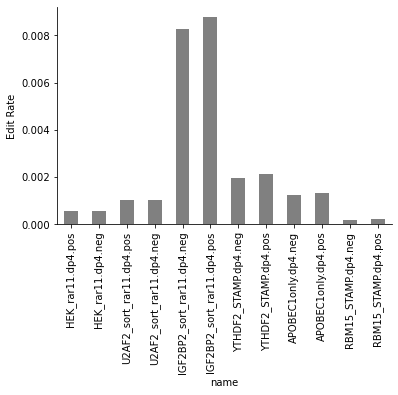

In [5]:
edit_rates.set_index('name')['edit rate'].plot.bar(color = 'Grey')
plt.ylabel('Edit Rate')
sns.despine()

# Edit rate per circle, exploratory analysis

In [6]:
rate_df = []
for name in circ_level_edits_df:
    df = circ_level_edits_df[name]
    df = df.loc[df.ge(1).all(axis = 1)]
    rate = df['ALT']/df.sum(axis = 1)
    rate.name = name
    rate_df.append(rate)
    
rate_df = pd.concat(rate_df, axis = 1)

<AxesSubplot: xlabel='HEK_rar11.dp4.pos', ylabel='HEK_rar11.dp4.neg'>

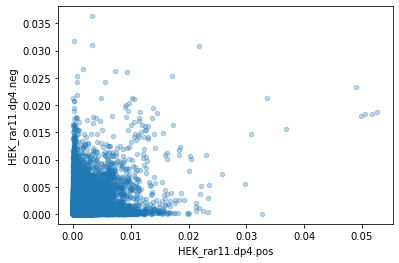

In [7]:

rate_df.plot.scatter(x = 'HEK_rar11.dp4.pos', y = 'HEK_rar11.dp4.neg', alpha = 0.3)

<AxesSubplot: xlabel='APOBEC1only.dp4.pos', ylabel='APOBEC1only.dp4.neg'>

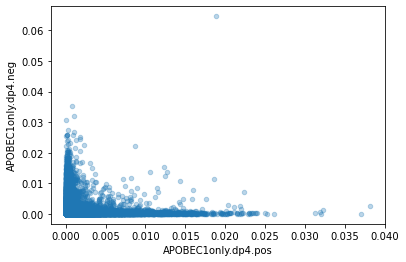

In [8]:
rate_df.plot.scatter(x = 'APOBEC1only.dp4.pos', y = 'APOBEC1only.dp4.neg', alpha = 0.3)

<AxesSubplot: xlabel='APOBEC1only.dp4.pos', ylabel='HEK_rar11.dp4.pos'>

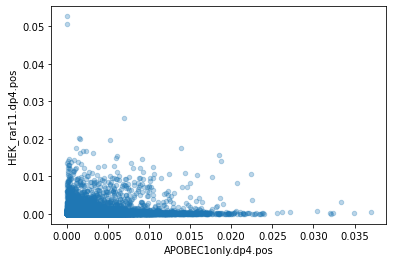

In [9]:
rate_df.plot.scatter(x = 'APOBEC1only.dp4.pos', y = 'HEK_rar11.dp4.pos', alpha = 0.3)

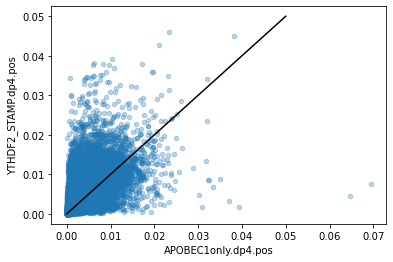

In [28]:
rate_df.plot.scatter(x = 'APOBEC1only.dp4.pos', y = 'YTHDF2_STAMP.dp4.pos', alpha = 0.3)
plt.plot([0,0.05], [0,0.05], color = 'black')

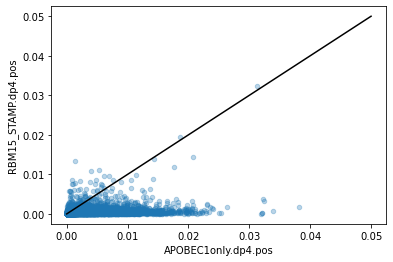

In [29]:
rate_df.plot.scatter(x = 'APOBEC1only.dp4.pos', y = 'RBM15_STAMP.dp4.pos', alpha = 0.3)
plt.plot([0,0.05], [0,0.05], color = 'black')

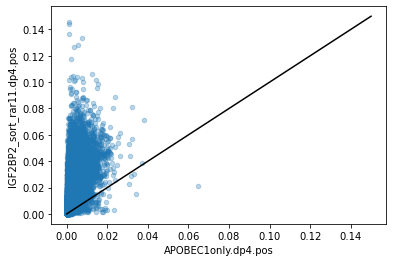

In [32]:
rate_df.plot.scatter(x = 'APOBEC1only.dp4.pos', y = 'IGF2BP2_sort_rar11.dp4.pos', alpha = 0.3)
plt.plot([0,0.15], [0,0.15], color = 'black')

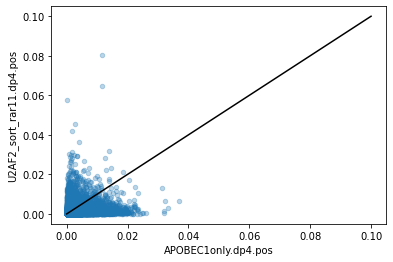

In [33]:
rate_df.plot.scatter(x = 'APOBEC1only.dp4.pos', y = 'U2AF2_sort_rar11.dp4.pos', alpha = 0.3)
plt.plot([0,0.1], [0,0.1], color = 'black')

In [22]:
ythdf2 = pd.read_csv('/home/hsher/scratch/ythdf2_stamp.chr5.tsv', sep = '\t', names = 
                    ['CHROM', 'POS', 'REF', 'ALT', 'FILTER', 'TYPE', 'DP',
                     'AD', 'ADF', 'ADR'])
apobec = pd.read_csv('/home/hsher/scratch/apobec.chr5.tsv', sep = '\t',
                    names = 
                    ['CHROM', 'POS', 'REF', 'ALT', 'FILTER', 'TYPE', 'DP',
                     'AD', 'ADF', 'ADR'])

In [23]:
all_data = apobec.merge(ythdf2, left_on = ['CHROM', 'POS', 'REF'],
             right_on = ['CHROM', 'POS', 'REF'],
            suffixes = ('_apobec', '_ythdf'))

In [26]:
ythdf2.shape

(4489, 10)

In [16]:
mixed = all_data.loc[all_data['TYPE_apobec']=='MIXED']
(mixed['ALT_apobec']==mixed['ALT_ythdf']).all()

False

In [17]:
mixed.shape

(76, 17)

In [18]:
mixed.loc[(mixed['ALT_apobec']==mixed['ALT_ythdf'])]

,CHROM,POS,REF,ALT_apobec,FILTER_apobec,TYPE_apobec,DP_apobec,AD_apobec,ADF_apobec,ADR_apobec,ALT_ythdf,FILTER_ythdf,TYPE_ythdf,DP_ythdf,AD_ythdf,ADF_ythdf,ADR_ythdf
90,chr5:134910335|134970092,13050,G,"A,<*>",PASS,MIXED,3,"0,3,0","0,3,0","0,0,0","A,<*>",PASS,MIXED,3,"0,3,0","0,3,0","0,0,0"
99,chr5:134910335|134970092,13068,G,"A,<*>",PASS,MIXED,4,"0,3,0","0,3,0","0,0,0","A,<*>",PASS,MIXED,5,"0,5,0","0,5,0","0,0,0"
144,chr5:134910335|134970092,13299,G,"T,<*>",PASS,MIXED,4,"0,4,0","0,4,0","0,0,0","T,<*>",PASS,MIXED,4,"0,4,0","0,4,0","0,0,0"
157,chr5:134910335|134970092,13401,G,"T,<*>",PASS,MIXED,3,"1,2,0","1,2,0","0,0,0","T,<*>",PASS,MIXED,8,"0,8,0","0,8,0","0,0,0"
162,chr5:134910335|134970092,13419,G,"C,<*>",PASS,MIXED,17,"1,16,0","1,16,0","0,0,0","C,<*>",PASS,MIXED,38,"0,33,0","0,33,0","0,0,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,chr5:134910335|134970092,77347,G,"A,<*>",PASS,MIXED,4,"0,4,0","0,3,0","0,1,0","A,<*>",PASS,MIXED,17,"3,14,0","3,14,0","0,0,0"
2514,chr5:134910335|134970092,77354,G,"A,<*>",PASS,MIXED,8,"0,8,0","0,3,0","0,5,0","A,<*>",PASS,MIXED,22,"0,22,0","0,22,0","0,0,0"
2530,chr5:134910335|134970092,77410,G,"A,<*>",PASS,MIXED,204,"0,180,0","0,54,0","0,126,0","A,<*>",PASS,MIXED,260,"0,241,0","0,113,0","0,128,0"
2588,chr5:134910335|134970092,77619,G,"A,<*>",PASS,MIXED,51,"2,47,0","0,15,0","2,32,0","A,<*>",PASS,MIXED,60,"2,52,0","0,19,0","2,33,0"


In [19]:
mixed.loc[(mixed['ALT_apobec']!=mixed['ALT_ythdf'])]

,CHROM,POS,REF,ALT_apobec,FILTER_apobec,TYPE_apobec,DP_apobec,AD_apobec,ADF_apobec,ADR_apobec,ALT_ythdf,FILTER_ythdf,TYPE_ythdf,DP_ythdf,AD_ythdf,ADF_ythdf,ADR_ythdf
263,chr5:134910335|134970092,13842,G,"T,<*>",PASS,MIXED,38,"32,2,0","31,2,0","1,0,0",<*>,PASS,SYMBOLIC,42,"36,0","36,0","0,0"
781,chr5:134910335|134970092,16566,G,"T,<*>",PASS,MIXED,144,"126,1,0","115,1,0","11,0,0",<*>,PASS,SYMBOLIC,149,"143,0","124,0","19,0"
789,chr5:134910335|134970092,16592,G,"A,<*>",PASS,MIXED,40,"37,1,0","29,0,0","8,1,0",<*>,PASS,SYMBOLIC,47,"45,0","31,0","14,0"
899,chr5:134910335|134970092,16919,G,"T,<*>",PASS,MIXED,222,"196,1,0","153,1,0","43,0,0",<*>,PASS,SYMBOLIC,217,"203,0","157,0","46,0"
1043,chr5:134910335|134970092,17418,G,"T,<*>",PASS,MIXED,180,"157,1,0","140,0,0","17,1,0",<*>,PASS,SYMBOLIC,163,"151,0","124,0","27,0"
1044,chr5:134910335|134970092,17421,G,"A,<*>",PASS,MIXED,182,"160,1,0","140,1,0","20,0,0",<*>,PASS,SYMBOLIC,177,"169,0","131,0","38,0"
1659,chr5:134910335|134970092,73600,G,"T,<*>",PASS,MIXED,34,"31,2,0","4,0,0","27,2,0",<*>,PASS,SYMBOLIC,94,"71,0","41,0","30,0"
2170,chr5:134910335|134970092,76250,G,"A,<*>",PASS,MIXED,141,"124,1,0","42,0,0","82,1,0",<*>,PASS,SYMBOLIC,254,"221,0","93,0","128,0"
2201,chr5:134910335|134970092,76350,G,"A,<*>",PASS,MIXED,36,"32,1,0","12,0,0","20,1,0",<*>,PASS,SYMBOLIC,44,"42,0","18,0","24,0"
2311,chr5:134910335|134970092,76677,G,"T,<*>",PASS,MIXED,220,"204,1,0","21,0,0","183,1,0",<*>,PASS,SYMBOLIC,230,"220,0","60,0","160,0"


In [20]:
all_data.loc[(all_data['TYPE_apobec']=='SYMBOLIC')&(all_data['ALT_apobec'].str.contains('A'))]

,CHROM,POS,REF,ALT_apobec,FILTER_apobec,TYPE_apobec,DP_apobec,AD_apobec,ADF_apobec,ADR_apobec,ALT_ythdf,FILTER_ythdf,TYPE_ythdf,DP_ythdf,AD_ythdf,ADF_ythdf,ADR_ythdf
